# **INTERNSHIP STUDIO PROJECT :- MARKETING CAMPAIGN FOR BANK PRODUCTS**

This project is about a bank finding the more reliable persons for converting them to person loan customers. They have a previous experience of doing a campaign and collected the data from different customers and found that 9 percent of 5000 people converted to personal loan customers. So they dont want to waste time again this this time for visiting all 5000 customers just for mere 9 percent though it was healthy. So we need to build a model such that we can filter customers who have maximum probability to convert into personal loan customers so that the bank can concentrate on those people only and can easily increase the percentage and reduce the cost for campaign this time.

# **1)Laoding the data and analysis**

**First we import all the required libraries for the project**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 ------

**we now load the data**

In [28]:
data=pd.read_csv("C:\lucky\internship studio\Bank_Personal_Loan_Modelling.csv")

In [29]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


---

**let us check out the shape, size, dtypes,no of dimensions of the data**

In [30]:
data.shape

(5000, 14)

In [31]:
data.size

70000

In [32]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [33]:
data.ndim

2

**List of column names**

In [34]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

---

**First 5 rows and last 5 rows of the data**



In [35]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [36]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**Info regarding the data**

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**From info the observed points are**

1. there are total 5000 rows in the given dataset
2. there are 14 columns in the given dataset
3. out of all the 14 columns 13 columns are of integer type and only 1 column  is of float datatype
4. there are no null values in the data





## **Statistical summary of data**

In [38]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [39]:
data.mean()

ID                     2500.500000
Age                      45.338400
Experience               20.104600
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Personal Loan             0.096000
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
dtype: float64

In [40]:
data['Age'].mean()

45.3384

In [41]:
data['Age'].max()

67

In [42]:
data['Age'].min()

23

#### **Inference from statistical summary**


1.  The last 4 columns are binary type categorical data
2.  From datatypes it can be said that except ccaverage column all other columns are discrete
3.  Experience column has a minimum value of -3 so it means there are negative values in the data



### **Let us check for any null values present in data**

In [43]:
data.isna()
#this just gives boolean values throughout the table

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
pd.isnull(data).any(axis=1)
#this gives boolean along the axis 1 i.e rows for null values if any

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [45]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [46]:
data[pd.isnull(data).any(axis=1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


### **Therefore no rows are displayed which implies there are no missing values in the given dataset**
 So there is no need to clean the null values since data is already free from null values but there is still some data cleaning required

# **2) Data Cleaning**

### it is very clear that id is just like a serial number and anyhow we had index for that purpose
#### Let us remove that column

In [47]:
data=data.drop(labels="ID",axis=1)

In [48]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [49]:
data.shape

(5000, 13)

### From statistical summary we got to know that experience column has negative values and we dont konw whether the negative values are from data collection errors or they are signifying 0 experience 
so we fill all the negative columns with the median of experience column

In [50]:
int(np.median(data.Experience))

20

In [51]:
data.Experience=data['Experience'].replace([-1,-2,-3],int(np.median(data['Experience'])))

In [52]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [53]:
data.Experience.describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

**Let us check for any duplicated rows so that we can keep the repeated rows only single time**

In [54]:
data.duplicated().value_counts()

False    5000
dtype: int64

Therefore no duplicated rows in th cleaned dataframe

## Note:-
1. **Until now we cleaned the data as much as possible from the data analysis but still we dont know which columns are highly correlated so that we can remove one of them**
2. **It is hard here itself to identify these pairs of correlation** 
3. **it will be easy if we use EDA and visualise the plots between columns to recognise any strong correlations**
4. **This we will do in the visualisation and do the left over cleaning there**

# **3) EDA (Exploratory Data Analysis)**

**Let us find all the unique values in each columns**

In [55]:
data.dtypes.value_counts()

int64      12
float64     1
dtype: int64

In [56]:
np.sort(data['Age'].unique())

array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67], dtype=int64)

In [57]:
np.sort(data['Income'].unique())

array([  8,   9,  10,  11,  12,  13,  14,  15,  18,  19,  20,  21,  22,
        23,  24,  25,  28,  29,  30,  31,  32,  33,  34,  35,  38,  39,
        40,  41,  42,  43,  44,  45,  48,  49,  50,  51,  52,  53,  54,
        55,  58,  59,  60,  61,  62,  63,  64,  65,  68,  69,  70,  71,
        72,  73,  74,  75,  78,  79,  80,  81,  82,  83,  84,  85,  88,
        89,  90,  91,  92,  93,  94,  95,  98,  99, 100, 101, 102, 103,
       104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120,
       121, 122, 123, 124, 125, 128, 129, 130, 131, 132, 133, 134, 135,
       138, 139, 140, 141, 142, 143, 144, 145, 148, 149, 150, 151, 152,
       153, 154, 155, 158, 159, 160, 161, 162, 163, 164, 165, 168, 169,
       170, 171, 172, 173, 174, 175, 178, 179, 180, 181, 182, 183, 184,
       185, 188, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 201,
       202, 203, 204, 205, 218, 224], dtype=int64)

In [58]:
np.sort(data['Experience'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43], dtype=int64)

In [59]:
np.sort(data['ZIP Code'].unique())

array([ 9307, 90005, 90007, 90009, 90011, 90016, 90018, 90019, 90024,
       90025, 90027, 90028, 90029, 90032, 90033, 90034, 90035, 90036,
       90037, 90041, 90044, 90045, 90048, 90049, 90057, 90058, 90059,
       90064, 90065, 90066, 90068, 90071, 90073, 90086, 90089, 90095,
       90210, 90212, 90230, 90232, 90245, 90250, 90254, 90266, 90272,
       90274, 90275, 90277, 90280, 90291, 90304, 90401, 90404, 90405,
       90502, 90503, 90504, 90505, 90509, 90601, 90623, 90630, 90638,
       90639, 90640, 90650, 90717, 90720, 90740, 90745, 90747, 90755,
       90813, 90840, 91006, 91007, 91016, 91024, 91030, 91040, 91101,
       91103, 91105, 91107, 91109, 91116, 91125, 91129, 91203, 91207,
       91301, 91302, 91304, 91311, 91320, 91326, 91330, 91335, 91342,
       91343, 91345, 91355, 91360, 91361, 91365, 91367, 91380, 91401,
       91423, 91604, 91605, 91614, 91706, 91709, 91710, 91711, 91730,
       91741, 91745, 91754, 91763, 91765, 91768, 91770, 91773, 91775,
       91784, 91791,

In [60]:
np.sort(data['Family'].unique())

array([1, 2, 3, 4], dtype=int64)

In [61]:
np.sort(data['CCAvg'].unique())

array([ 0.  ,  0.1 ,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  0.67,  0.7 ,
        0.75,  0.8 ,  0.9 ,  1.  ,  1.1 ,  1.2 ,  1.3 ,  1.33,  1.4 ,
        1.5 ,  1.6 ,  1.67,  1.7 ,  1.75,  1.8 ,  1.9 ,  2.  ,  2.1 ,
        2.2 ,  2.3 ,  2.33,  2.4 ,  2.5 ,  2.6 ,  2.67,  2.7 ,  2.75,
        2.8 ,  2.9 ,  3.  ,  3.1 ,  3.2 ,  3.25,  3.3 ,  3.33,  3.4 ,
        3.5 ,  3.6 ,  3.67,  3.7 ,  3.8 ,  3.9 ,  4.  ,  4.1 ,  4.2 ,
        4.25,  4.3 ,  4.33,  4.4 ,  4.5 ,  4.6 ,  4.67,  4.7 ,  4.75,
        4.8 ,  4.9 ,  5.  ,  5.1 ,  5.2 ,  5.3 ,  5.33,  5.4 ,  5.5 ,
        5.6 ,  5.67,  5.7 ,  5.8 ,  5.9 ,  6.  ,  6.1 ,  6.2 ,  6.3 ,
        6.33,  6.4 ,  6.5 ,  6.6 ,  6.67,  6.7 ,  6.8 ,  6.9 ,  7.  ,
        7.2 ,  7.3 ,  7.4 ,  7.5 ,  7.6 ,  7.8 ,  7.9 ,  8.  ,  8.1 ,
        8.2 ,  8.3 ,  8.5 ,  8.6 ,  8.8 ,  8.9 ,  9.  ,  9.3 , 10.  ])

In [62]:
np.sort(data['Education'].unique())

array([1, 2, 3], dtype=int64)

In [63]:
np.sort(data['Mortgage'].unique())

array([  0,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 25

In [64]:
np.sort(data['Personal Loan'].unique())

array([0, 1], dtype=int64)

In [65]:
np.sort(data['Securities Account'].unique())

array([0, 1], dtype=int64)

In [66]:
np.sort(data['CD Account'].unique())

array([0, 1], dtype=int64)

In [67]:
np.sort(data['Online'].unique())

array([0, 1], dtype=int64)

In [68]:
np.sort(data['CreditCard'].unique())

array([0, 1], dtype=int64)

### **no of unique value in mortgage and other useful columns**

In [69]:
data['Mortgage'].nunique()

347

In [70]:
data['ZIP Code'].nunique()

467

In [71]:
data.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**Here the zip code is also like a serial number and had a lot of unique numbers i.e, 467 which are in a serial mostly, So we can remove this column**

In [72]:
data=data.drop(labels='ZIP Code',axis=1)

In [73]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### **no of 0 value in mortgage and credit cards columns**

In [74]:
data['Mortgage'].value_counts()[0]

3462

In [75]:
data['CreditCard'].value_counts()[0]

3530

### **value counts of all the categorical columns using a for loop**

In [76]:
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [77]:
data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [78]:
for column in data.columns.to_list()[-5:]:
  print(column+": \n"+str(data[column].value_counts()))

Personal Loan: 
0    4520
1     480
Name: Personal Loan, dtype: int64
Securities Account: 
0    4478
1     522
Name: Securities Account, dtype: int64
CD Account: 
0    4698
1     302
Name: CD Account, dtype: int64
Online: 
1    2984
0    2016
Name: Online, dtype: int64
CreditCard: 
0    3530
1    1470
Name: CreditCard, dtype: int64


## **Visualization**

## **Let us visualize the Data**

**we use seaborn pairplot to get graphs between all columns and then visualize the rquired pairs of columns after deciding from pairplot**

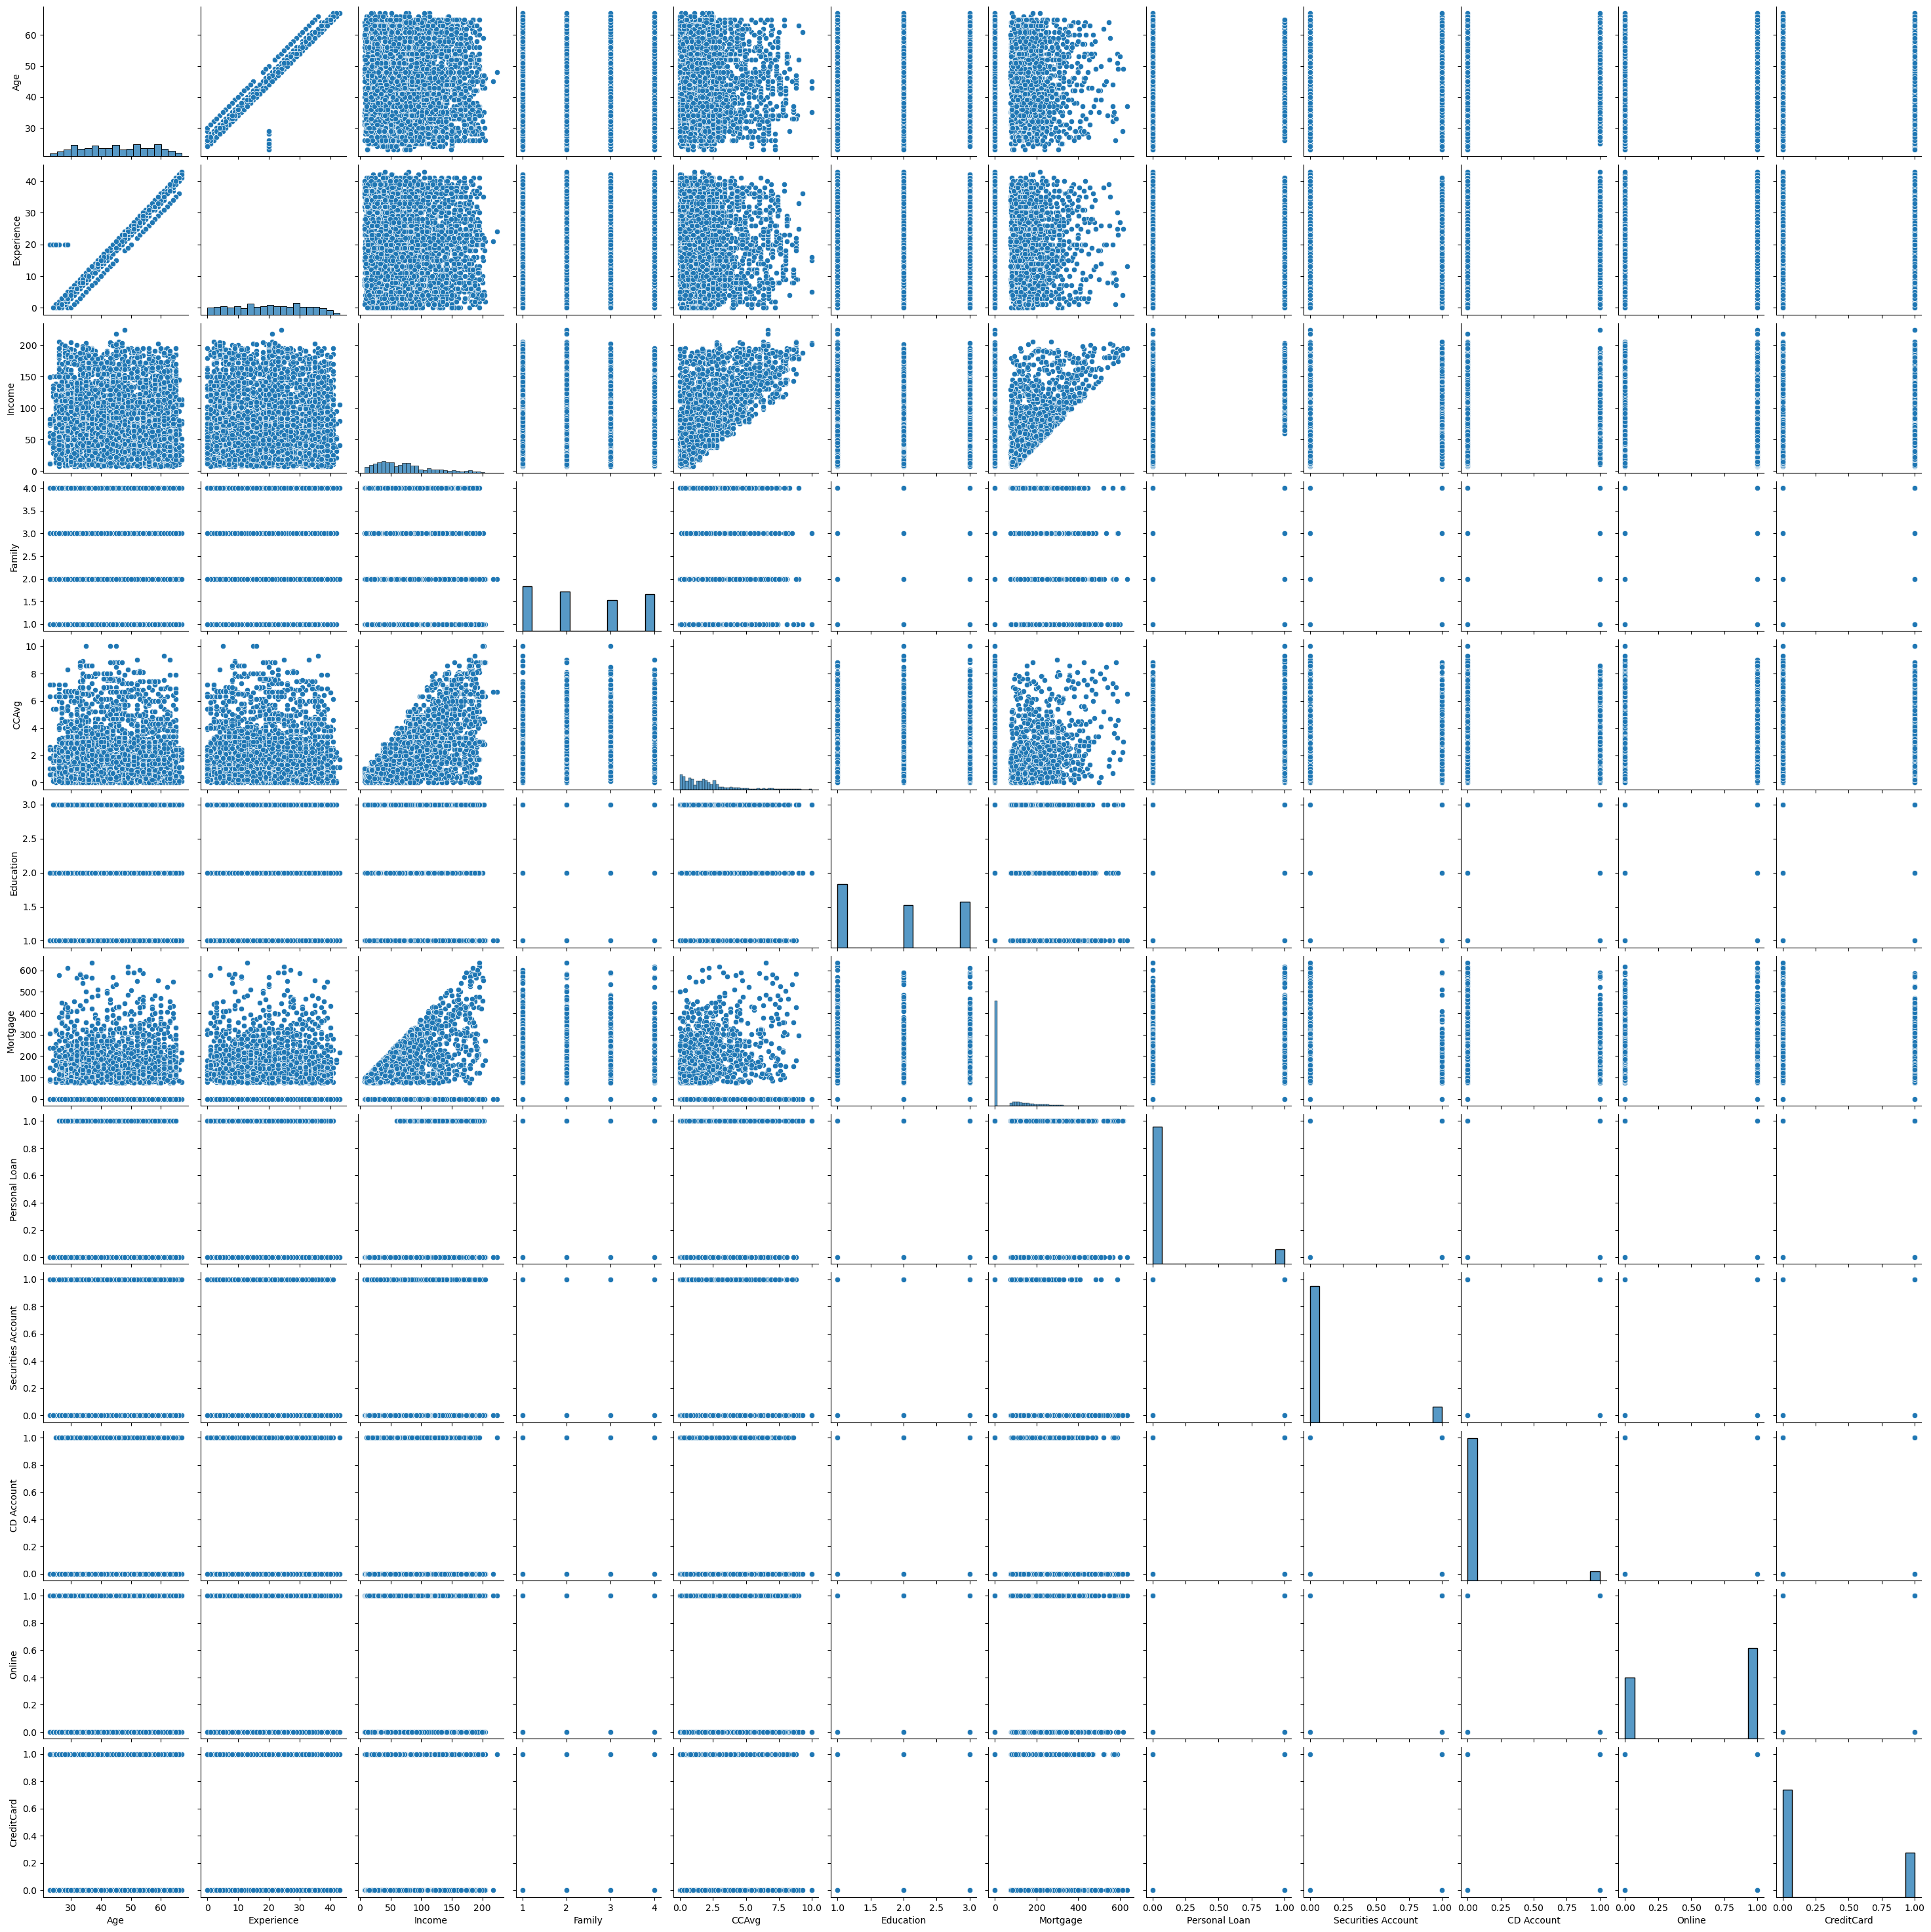

In [79]:
sns.pairplot(data)

**It seems like age and experience are highly correlated**

**Let us visualize them using a scatter plot**

In [80]:
fig=plt.figure(figsize=(16,16))
plt.scatter(data.Age,data.Experience)

### It is very clear from the graph that experience and age are highly correlated and even a few violation on the left is also due to replacement of negative values in experience to median otherwise thier would be  a perfect correlation

In [81]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045528,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048718,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018074,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014013,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005526,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


**From the above correlationtable we can say correlation between experience and age is almost one and we cannot find anyother significant correlation** 

**So now we can remove the experience column from the data since age can serve the purpose of both age and column at a time**

In [82]:
data=data.drop(labels='Experience',axis=1)

In [83]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [84]:
data.shape

(5000, 11)

**We will continue with our visualisation part**

### Univariate Analysis

**We visualise each column individually so that we can know how they are distributed**

We generally dont need to visualise last five binary columns since there will be only bars which represent the count of 1 and 0 which we had already seen in EDA

**Age**

In [85]:
plt.hist(data.Age)

(array([262., 487., 632., 479., 532., 600., 524., 678., 504., 302.]),
 array([23. , 27.4, 31.8, 36.2, 40.6, 45. , 49.4, 53.8, 58.2, 62.6, 67. ]),
 <BarContainer object of 10 artists>)

**Mortgage**

In [86]:
plt.hist(data.Mortgage)

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <BarContainer object of 10 artists>)

most of the data has Mortgage is inbetween 0 and 200 and is positively skewed

**CC Average**

In [87]:
plt.hist(data.CCAvg)

(array([1683., 1376., 1039.,  319.,  219.,   97.,  132.,   84.,   45.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

most of the data has cca average inbetween 0 and 3 and is positively skewed

**Income**

In [88]:
plt.hist(data.Income)

(array([ 802., 1153.,  867.,  879.,  377.,  307.,  268.,  197.,  141.,
           9.]),
 array([  8. ,  29.6,  51.2,  72.8,  94.4, 116. , 137.6, 159.2, 180.8,
        202.4, 224. ]),
 <BarContainer object of 10 artists>)

most of the people have income 8 and 70 and positively skewed

**Family**

In [89]:
data.Family.value_counts().sort_index().plot.bar()

<AxesSubplot:>

most no of people have 1,2 or 4 family memebers

**Education**

In [90]:
data.Education.value_counts().sort_index().plot.bar()

<AxesSubplot:>

most of the people have education level of 1 and the next highest is 3

**Let us check for outliers**

In [91]:
sns.boxplot(data.Income)

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

In [92]:
sns.boxplot(data['Age'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

In [93]:
sns.boxplot(data['CCAvg'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CCAvg'>

In [94]:
sns.boxplot(data['Mortgage'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mortgage'>

**We can find that we have a few outliers in income, mortgage and cc average columns**

### Bivariate Analysis

As our target variable is personal loan we mainly focus the plots containing the personal loan

In [95]:
sns.boxplot(x=data['Personal Loan'],y=data['Age'],data=data)

<AxesSubplot:xlabel='Personal Loan', ylabel='Age'>

In [96]:
sns.boxplot(x=data['Personal Loan'],y=data['Income'],data=data)

<AxesSubplot:xlabel='Personal Loan', ylabel='Income'>

In [97]:
sns.boxplot(x=data['Personal Loan'],y=data['CCAvg'],data=data)

<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

In [98]:
pd.crosstab(data.Family,data['Personal Loan']).plot(kind="bar")

<AxesSubplot:xlabel='Family'>

In [99]:
pd.crosstab(data.Education,data['Personal Loan']).plot(kind="bar")

<AxesSubplot:xlabel='Education'>

In [100]:
pd.crosstab(data.Online,data['Personal Loan']).plot(kind="bar")

<AxesSubplot:xlabel='Online'>

In [101]:
pd.crosstab(data.CreditCard,data['Personal Loan']).plot(kind="bar")

<AxesSubplot:xlabel='CreditCard'>

In [102]:
pd.crosstab(data['CD Account'],data['Personal Loan']).plot(kind="bar")

<AxesSubplot:xlabel='CD Account'>

In [103]:
pd.crosstab(data['Securities Account'],data['Personal Loan']).plot(kind="bar")

<AxesSubplot:xlabel='Securities Account'>

**Heatmap**

In [104]:
fig,ax= plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='plasma',annot=True)

<AxesSubplot:>

# 4) Transform the features

### In this part we remove any outliers since we had already done the remaining required feature transformations

**Let us use any of the two methods to find the outliers 1) IQR 2) Z-SCORE**

## a) IQR

In [105]:
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


**Let us find first quantile, third quantile and inter quartile range**

In [106]:
q1= data.quantile(0.25)
q3= data.quantile(0.75)
iqr=q3-q1
iqr

Age                    20.0
Income                 59.0
Family                  2.0
CCAvg                   1.8
Education               2.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
dtype: float64

**Let us remove the outliers that lie out of the 1.5 time iqr ranges**

In [107]:
data1=data[~((data<(q1-1.5*iqr))|(data>(q3+1.5*iqr)))]

In [108]:
data1.shape

(5000, 11)

In [109]:
data1

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49.0,4,1.6,1,0.0,0.0,NaN,0.0,0,0
1,45,34.0,3,1.5,1,0.0,0.0,NaN,0.0,0,0
2,39,11.0,1,1.0,1,0.0,0.0,0.0,0.0,0,0
3,35,100.0,1,2.7,2,0.0,0.0,0.0,0.0,0,0
4,35,45.0,4,1.0,2,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40.0,1,1.9,3,0.0,0.0,0.0,0.0,1,0
4996,30,15.0,4,0.4,1,85.0,0.0,0.0,0.0,1,0
4997,63,24.0,2,0.3,3,0.0,0.0,0.0,0.0,0,0
4998,65,49.0,3,0.5,2,0.0,0.0,0.0,0.0,1,0


**It seems like we dont have any outliers  and so we do not need to remove anything so let us continue with the dataset**

## b) Z score

In [110]:
from scipy.stats import zscore

**Calculate the absolute values of z score for ease of comparison**

In [111]:
abs=np.abs(zscore(data))

In [112]:
abs

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.774417,0.538229,1.397414,0.193385,1.049078,0.555524,0.325875,2.928915,0.25354,1.216618,0.645314
1,0.029524,0.864109,0.525991,0.250611,1.049078,0.555524,0.325875,2.928915,0.25354,1.216618,0.645314
2,0.552992,1.363793,1.216855,0.536736,1.049078,0.555524,0.325875,0.341423,0.25354,1.216618,0.645314
3,0.901970,0.569765,1.216855,0.436091,0.141703,0.555524,0.325875,0.341423,0.25354,1.216618,0.645314
4,0.901970,0.625130,1.397414,0.536736,0.141703,0.555524,0.325875,0.341423,0.25354,1.216618,1.549632
...,...,...,...,...,...,...,...,...,...,...,...
4995,1.425438,0.733757,1.216855,0.021710,1.332484,0.555524,0.325875,0.341423,0.25354,0.821951,0.645314
4996,1.338194,1.276892,1.397414,0.880087,1.049078,0.280238,0.325875,0.341423,0.25354,0.821951,0.645314
4997,1.540880,1.081363,0.345432,0.937312,1.332484,0.555524,0.325875,0.341423,0.25354,1.216618,0.645314
4998,1.715370,0.538229,0.525991,0.822862,0.141703,0.555524,0.325875,0.341423,0.25354,0.821951,0.645314


**remove the rows with absolute z score greater than 3**

In [113]:
filter=(abs<3).all(axis=1)

In [114]:
filter

0       True
1       True
2       True
3       True
4       True
        ... 
4995    True
4996    True
4997    True
4998    True
4999    True
Length: 5000, dtype: bool

In [115]:
dataf=data[filter]

In [116]:
dataf

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [117]:
for column in dataf.columns.to_list()[-5:]:
  print(column+": \n"+str(dataf[column].value_counts()))

Personal Loan: 
0    4223
Name: Personal Loan, dtype: int64
Securities Account: 
0    3870
1     353
Name: Securities Account, dtype: int64
CD Account: 
0    4223
Name: CD Account, dtype: int64
Online: 
1    2456
0    1767
Name: Online, dtype: int64
CreditCard: 
0    3069
1    1154
Name: CreditCard, dtype: int64


### NOTE

**Here if we remove the 800 rows it is clear that personal loan column would have only 0's i.e rows with 1's are all  removed , so we cannot build the model**

**As we have a lot of categorical data we better dont remove the outliers and we will continue with original data**

**Now we need to transform a few columns so that the skewedness that we observed in Univariate analysis can be removed**

We transform the age, income,ccaverage columns using log transform as remaining are categorical

In [118]:
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


**As mortagage has so many zeros and the data is distributed very less after 100 we can better do binning process and convert mortgage to a categorical data**

In [119]:
data['Mortgage'] = pd.cut(data['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)

In [120]:
data.Mortgage.value_counts()

0    3744
1     758
2     297
3     128
4      48
5      21
6       4
Name: Mortgage, dtype: int64

In [121]:
data.isnull().value_counts()

Age    Income  Family  CCAvg  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard
False  False   False   False  False      False     False          False               False       False   False         5000
dtype: int64

**Now let us extract age, income and cc avg columns so to reduce complex and long codes**

In [122]:
datan=data[['Age','Income','CCAvg',]]

In [123]:
datan

,Age,Income,CCAvg
0,25,49,1.6
1,45,34,1.5
2,39,11,1.0
3,35,100,2.7
4,35,45,1.0
...,...,...,...
4995,29,40,1.9
4996,30,15,0.4
4997,63,24,0.3
4998,65,49,0.5


**We use log transform to remove the skewedness from these three columns**

In [124]:
datan=np.log(datan+1)

In [125]:
datan

,Age,Income,CCAvg
0,3.258097,3.912023,0.955511
1,3.828641,3.555348,0.916291
2,3.688879,2.484907,0.693147
3,3.583519,4.615121,1.308333
4,3.583519,3.828641,0.693147
...,...,...,...
4995,3.401197,3.713572,1.064711
4996,3.433987,2.772589,0.336472
4997,4.158883,3.218876,0.262364
4998,4.189655,3.912023,0.405465


In [126]:
datan.isna().value_counts()

Age    Income  CCAvg
False  False   False    5000
dtype: int64

**Let us check out how our columns are distributed after transformation and whether the skewedness is removed or not**

In [127]:
plt.hist(datan.Income)

(array([  99.,  126.,  282.,  413.,  699.,  770., 1020.,  669.,  613.,
         309.]),
 array([2.19722458, 2.51911216, 2.84099974, 3.16288732, 3.48477491,
        3.80666249, 4.12855007, 4.45043765, 4.77232524, 5.09421282,
        5.4161004 ]),
 <BarContainer object of 10 artists>)

In [128]:
plt.hist(datan.Age)

(array([ 93., 272., 384., 525., 461., 536., 606., 782., 794., 547.]),
 array([3.17805383, 3.28219922, 3.38634461, 3.49048999, 3.59463538,
        3.69878077, 3.80292616, 3.90707154, 4.01121693, 4.11536232,
        4.21950771]),
 <BarContainer object of 10 artists>)

In [129]:
plt.hist(datan.CCAvg)

(array([493., 701., 720., 702., 919., 658., 327., 208., 208.,  64.]),
 array([0.        , 0.23978953, 0.47957905, 0.71936858, 0.95915811,
        1.19894764, 1.43873716, 1.67852669, 1.91831622, 2.15810575,
        2.39789527]),
 <BarContainer object of 10 artists>)

In [130]:
data.Mortgage.value_counts().sort_index().plot.bar()

<AxesSubplot:>

**We can see from the above graphs that we removed the skewness as much as possible and all of them look very much like normal data which is very useful for logistic regression model, now let us move on to normalising the data**

# 5) Normalising and splitting Data

**We use standard scaler to scale the data**

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
datan.head()

,Age,Income,CCAvg
0,3.258097,3.912023,0.955511
1,3.828641,3.555348,0.916291
2,3.688879,2.484907,0.693147
3,3.583519,4.615121,1.308333
4,3.583519,3.828641,0.693147


In [133]:
scaler=StandardScaler()

In [134]:
datan=scaler.fit_transform(datan)

In [135]:
datan=pd.DataFrame(datan,columns=['Age','Income','CCAvg'])

In [136]:
datan

,Age,Income,CCAvg
0,-2.092819,-0.286700,0.049051
1,0.097306,-0.811294,-0.024503
2,-0.439192,-2.385689,-0.442985
3,-0.843634,0.747409,0.710731
4,-0.843634,-0.409337,-0.442985
...,...,...,...
4995,-1.543504,-0.578579,0.253843
4996,-1.417635,-1.962569,-1.111892
4997,1.364990,-1.306174,-1.250874
4998,1.483112,-0.286700,-0.982503


### we replace back the three columns we extracted previously from the main dataset as we have completed all the transformations and normalisations

In [137]:
data[['Age','Income','CCAvg']]=datan

In [138]:
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-2.092819,-0.286700,4,0.049051,1,0,0,1,0,0,0
1,0.097306,-0.811294,3,-0.024503,1,0,0,1,0,0,0
2,-0.439192,-2.385689,1,-0.442985,1,0,0,0,0,0,0
3,-0.843634,0.747409,1,0.710731,2,0,0,0,0,0,0
4,-0.843634,-0.409337,4,-0.442985,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.543504,-0.578579,1,0.253843,3,0,0,0,0,1,0
4996,-1.417635,-1.962569,4,-1.111892,1,0,0,0,0,1,0
4997,1.364990,-1.306174,2,-1.250874,3,0,0,0,0,0,0
4998,1.483112,-0.286700,3,-0.982503,2,0,0,0,0,1,0


In [139]:
dataf.isna().value_counts()

Age    Income  Family  CCAvg  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard
False  False   False   False  False      False     False          False               False       False   False         4223
dtype: int64

### We are done with all the data analysis required from simple cleaning to complex scaling
### Its time to move on to build our model with the cleaned and analytically prepared data

**befor building the model let us split our data into train and test sets**

Here we can see that the tasrget variable personal loan has only 9 percent 1,s and remaining zero so here normal splitting would cause loss of enough 1's to either of train or test sets
So we use stratified sampling in order to have good enough no of 1's in both train and test sets

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**First of all we split the data into x and y and then later we sperate for train and test in both x and y**

In [141]:
x=data.drop(labels='Personal Loan',axis=1)

In [142]:
x

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-2.092819,-0.286700,4,0.049051,1,0,1,0,0,0
1,0.097306,-0.811294,3,-0.024503,1,0,1,0,0,0
2,-0.439192,-2.385689,1,-0.442985,1,0,0,0,0,0
3,-0.843634,0.747409,1,0.710731,2,0,0,0,0,0
4,-0.843634,-0.409337,4,-0.442985,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,-1.543504,-0.578579,1,0.253843,3,0,0,0,1,0
4996,-1.417635,-1.962569,4,-1.111892,1,0,0,0,1,0
4997,1.364990,-1.306174,2,-1.250874,3,0,0,0,0,0
4998,1.483112,-0.286700,3,-0.982503,2,0,0,0,1,0


In [143]:
y=data[['Personal Loan']]

In [144]:
y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


### Stratified sampling

In [145]:
xtr,xts,ytr,yts= train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)

In [146]:
xtr.shape

(3500, 10)

In [147]:
ytr.shape

(3500, 1)

**Let us check the value counts of ytrain and ytest and ensure considerable no of 1's are present in both**

In [148]:
ytr.value_counts()

Personal Loan
0                3164
1                 336
dtype: int64

In [149]:
yts.value_counts()

Personal Loan
0                1356
1                 144
dtype: int64

**value counts look promising so let us move on to build the model**

# 6) Logistic Regression

**Now we implement and build the model and test for the accuracy**

**befor we fit the model we need to convert the ytrain to a numpy array and reshape it into required shape**

In [150]:
ytrn=ytr.to_numpy()
ytrn=ytrn.reshape((3500,))

In [151]:
clf = LogisticRegression(random_state=0).fit(xtr, ytrn)

### Let us evaluate the accuracy score of the classification on train and test sets

In [152]:
clf.score(xtr,ytr)

0.9568571428571429

In [153]:
clf.score(xts,yts)

0.956

**Here we did achieve accuracy of 95.6 percent in bith test and train set which is saying that our model is good in fitting and as well as predicting**

**As we completed our model next step is to evaluate the metrics so that we can get a clear understanding of our model and its performance**

**In order to evaluate metrics we need to get the prediction stes for training and test data**

In [154]:
ytrp=clf.predict(xtr)

In [155]:
ytrp=pd.DataFrame(ytrp,columns=['Personal Loan'])

In [156]:
ytrp.value_counts()

Personal Loan
0                3241
1                 259
dtype: int64

In [157]:
ytsp=pd.DataFrame(clf.predict(xts),columns=['Personal Loan'])

In [158]:
ytsp.value_counts()

Personal Loan
0                1386
1                 114
dtype: int64

**We are ready with the required predictions sets to evaluate metrics**

# 7) Metrics

**let us evaluate different type of metrics**

### Importing the metrics library from sklearn

In [159]:
from sklearn import metrics

### **Accuracy**

In [160]:
metrics.accuracy_score(ytr,ytrp)

0.9568571428571429

In [161]:
metrics.accuracy_score(yts,ytsp)

0.956

### Confusion matrix

In [162]:
metrics.confusion_matrix(ytr,ytrp)

array([[3127,   37],
       [ 114,  222]], dtype=int64)

In [163]:
metrics.confusion_matrix(yts,ytsp)

array([[1338,   18],
       [  48,   96]], dtype=int64)

### balanced_accuracy_score

In [164]:
metrics.balanced_accuracy_score(ytr,ytrp)

0.8245101137800253

In [165]:
metrics.balanced_accuracy_score(yts,ytsp)

0.8266961651917404

**We got this value 0.82 which is close to 1 so this metric was good**

### average_precision_score

In [166]:
metrics.average_precision_score(ytr,ytrp)

0.5988979591836734

In [167]:
metrics.average_precision_score(yts,ytsp)

0.5934035087719298

**This value 0.6 is not so close to one but somewhat good enough**

### F1 Score

In [168]:
metrics.f1_score(ytr,ytrp)

0.7462184873949579

In [169]:
metrics.f1_score(yts,ytsp)

0.744186046511628

**F1 Score is close to 0.74 which seems to be good enough since this is a cumulative measure of both precision and recall**

### Cross entropy loss

In [170]:
metrics.log_loss(ytr,ytrp)

1.4901099487818381

In [171]:
metrics.log_loss(yts,ytsp)

1.5197157565452333

### Mathew Correlation Coefficient

In [172]:
metrics.matthews_corrcoef(ytr,ytrp)

0.7303931826354557

In [173]:
metrics.matthews_corrcoef(yts,ytsp)

0.72635859911533

**Here we got value 0.73 close to 1 so this is good**

### Precision and Recall values

In [174]:
metrics.recall_score(ytr,ytrp)

0.6607142857142857

In [175]:
metrics.precision_score(ytr,ytrp)

0.8571428571428571

In [176]:
metrics.recall_score(yts,ytsp)

0.6666666666666666

In [177]:
metrics.precision_score(yts,ytsp)

0.8421052631578947

**Recall is somewhat low i.e, 0.66 but precesion is high i.e, 0.84 so overall we are having good tradeoff between precesion and recall**

### ROC AUC Score

In [178]:
metrics.roc_auc_score(ytr,ytrp)

0.8245101137800251

In [179]:
metrics.roc_auc_score(yts,ytsp)

0.8266961651917404

**Here we got roc auc value 0.82 which is greater than 0.5 and somewhat close to 1 so therefore we can sy that this is good enough**

### Conclusion:-

1. We can say that almost all of the metrics are giving good values especially f1 score and accuracy
2. So our basic regression model is working well on the transformed data
3. So the transformations on data are correct and we can proceed furthur

# 8) Other classification algorithms

**Its time we check our data with other classification metrics and check how our data responds as already our logistic classifier is doing good**

## a) Support Vector Machine ( SVM )

In [180]:
from sklearn import svm

In [181]:
clf = svm.SVC(random_state=1).fit(xtr,ytrn)

In [182]:
clf.score(xtr,ytr)

0.9762857142857143

In [183]:
clf.score(xts,yts)

0.98

In [184]:
#confusion matrix for test set
ytsp=pd.DataFrame(clf.predict(xts),columns=['Personal Loan'])
print(metrics.confusion_matrix(yts,ytsp))

[[1353    3]
 [  27  117]]


**With SVM Algorithm we achieved a high accuracy of 97.6 and 98% which is an improvement to our normal classification model**

## b) Decision Tree

In [185]:
from sklearn import tree

In [186]:
clf = tree.DecisionTreeClassifier(max_depth=8,random_state=0).fit(xtr,ytrn)

In [187]:
clf.score(xtr,ytr)

0.9954285714285714

In [188]:
clf.score(xts,yts)

0.9826666666666667

In [189]:
#confusion matrix for test set
ytsp=pd.DataFrame(clf.predict(xts),columns=['Personal Loan'])
print(metrics.confusion_matrix(yts,ytsp))

[[1345   11]
 [  15  129]]


**With decision tree Algorithm we achieved 99.5% accuracy on training set and 98% on test set which is an improvement to our SVM model**

## c) Random Forest ( Ensemble Method )

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
clf = RandomForestClassifier(n_estimators=10,max_depth=8,random_state=0).fit(xtr,ytrn)

In [192]:
clf.score(xtr,ytr)

0.9954285714285714

In [193]:
clf.score(xts,yts)

0.9846666666666667

In [194]:
#confusion matrix for test set
ytsp=pd.DataFrame(clf.predict(xts),columns=['Personal Loan'])
print(metrics.confusion_matrix(yts,ytsp))

[[1349    7]
 [  16  128]]


**With random forest Algorithm we achieved the best performance till now since we got 99.5% and 98.5% accuracy**

## d) Extra Trees Classifier ( Ensemble Method)

In [195]:
from sklearn.ensemble import ExtraTreesClassifier

In [196]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=12,min_samples_split=2, random_state=0).fit(xtr,ytrn)

In [197]:
clf.score(xtr,ytr)

0.9868571428571429

In [198]:
clf.score(xts,yts)

0.968

In [199]:
#confusion matrix for test set
ytsp=pd.DataFrame(clf.predict(xts),columns=['Personal Loan'])
print(metrics.confusion_matrix(yts,ytsp))

[[1353    3]
 [  45   99]]


**This Algorithm was most extra careful on training set as it has 98.7% accuracy but doing relatively poor on test set with 97.8 accuracy which is less than random forest accuracy**

## e) Gradient Boosting

In [200]:
from sklearn.ensemble import GradientBoostingClassifier

In [201]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(xtr,ytrn)

In [202]:
clf.score(xtr,ytr)

0.9805714285714285

In [203]:
clf.score(xts,yts)

0.9766666666666667

In [204]:
#confusion matrix for test set
ytsp=pd.DataFrame(clf.predict(xts),columns=['Personal Loan'])
print(metrics.confusion_matrix(yts,ytsp))

[[1349    7]
 [  28  116]]


**Gradient boosting performed similar to SVM with 98 and 97.6 accuracies which is good but not up to the level of Ensemble Methods**

## Conclusion :-

1. We had fit 5 other models other than logistic regression and calculated accuracies 
2. Of all the 5 it is clear that Ensemble methods are performing well than any other Algorithm with accuracies close to 99%
3. SVM and Gradient boosting performed good after Ensemble methods with accuracies close to 98%
4. Therfore, Ensemble methods are the best Algorithms for classifications especially in this type of problem

**We have completed our project, before closing let us give a business understanding of our project**

# 9) Business Understanding

## Finally we are done with our project, so let us bring all the important points from different stages of our model and put them together for giving a business insights and understandings

### So there are two main parts where we can give a report they are EDA and model parts, so let us check them seperately

## Part 1:- EDA  and univariate / bivariate analysis

1. First thing we observed is experience and age are highly correlated.
2. The age among people is almost unifromly distributed which means all age groups are more or less in equal number.
3. CCAvg, Income and mortgage tend to be more skewed that is groups of large no of people have similar values among them than other groups with other values.
4. coming to features and their impacts on personal loan as this is what our concern, Its seems like age has no or very less impact on loan chance
5. more income has some positive impact on loan
6. more CC Average has very good positive impact on loan
7. Family has a positive impact on loan when increasing from 1 to 3 family members and bit negative when moving from 3 to 4 family members
8. more Education has good impact on loan chance
9. Online has no or very less impact on loan
10. Credit card has negative impact on loan
11. CD Account and Securities account has negative impact on loan

**Concluding this part we can say a person with more income, more CC average, with 2 or 3 family members, with more education, and with no credit card will get personal loan irrespective of other factors**

**If we check for an ideal person with all these specifications we must get one**

In [205]:
p=pd.DataFrame({'Age':0,'Income':1,'Family':3,'CCAvg':1,'Education':3,'Mortgage':0,'Securities Account':0,'CD Account':0,'Online':0,'CreditCard':0},index=range(0,1))

In [206]:
p

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0,1,3,1,3,0,0,0,0,0


In [207]:
# prediction of an ideal person with all good specifications
clf.predict(p)

array([1], dtype=int64)

**We got 1 which means that the specified conditions satisfy the model**

## Part 2 :- Model

**We will check all the models and then prefer the best one to use**

### Logistic Regression

train accuracy : 95.7

test accuracy  : 95.6

confusion matrix:

[1338 ,   18]

  [ 48 ,    96]

false negative = 48

false positive = 18

### SVM

train accuracy : 97.6

test accuracy : 98

confusion matrix:

[1353  ,  3]

[  27 , 117]

false negative = 27

false positive = 3

### Decesion Tree

train accuracy : 99.5

test accuracy : 98.26

confusion matrix:

[1345  ,  11]
 
 [  15 ,  129]

false negative = 15

false positive = 11

### Random forest

train accuracy : 99.5

test accuracy : 98.36

confusion matrix:

[1349 , 7]

[ 16 , 128]

false negative = 16

false positive = 7

### Extrem Tree classifiers

train accuracy : 98.7

test accuracy : 96.8

confusion matrix:

[1353 , 3]

[ 45 , 90]

false negative = 45

false positive = 3

### Gradient boosting

train accuracy : 98

test accuracy : 97.6

confusion matrix:

[1349 , 7]

[ 28 , 116]

false negative = 28

false positive = 7

## Conclusion of PART 2

**After comparing all the models we can say that the random forest algorithm is the best model with high accuracies and very less false positives and negatives**

**Therefore use random forests algorithm**

# THANK YOU

NAME :-YARRU LAKSHMI SAI KRISHNA

EMAIL :- yarrulakshmisai111@gmail.com